In [28]:
from dasquakes import *
import datetime
import numpy as np
from scipy.signal import butter, filtfilt

# 1. Choose the following parameters to select data to examine

In [ ]:
cable='whidbey'
record_length = 1 #minutes
t0 = datetime.datetime(2022, 5, 8, 0, 0, 0)

# 2. Run the functions to return the data

In [ ]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [21]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 6000, Number of channels: 1720
Nyquist Frequency: 50.0 Hz, cable length: 10975.238056182861 m


# 4. Make a simple plot of the data

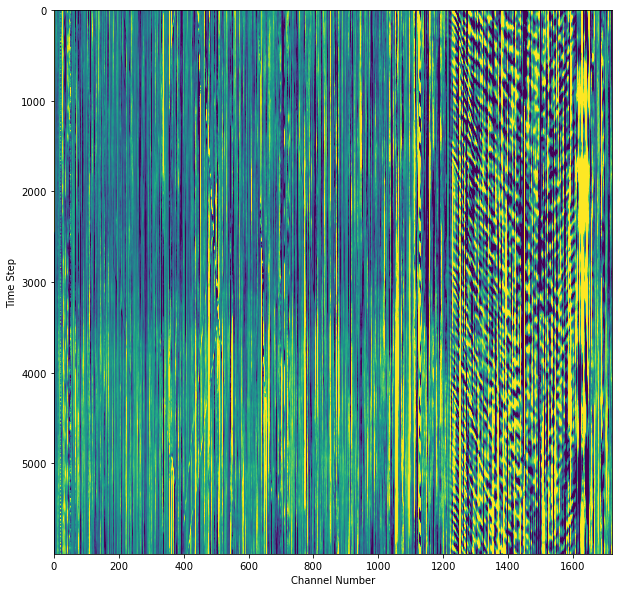

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()

In [16]:
cable='seadasn'
record_length = 30 #minutes
t0 = datetime.datetime(2022,11, 4, 21, 30, 0)

In [17]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [18]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 180000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


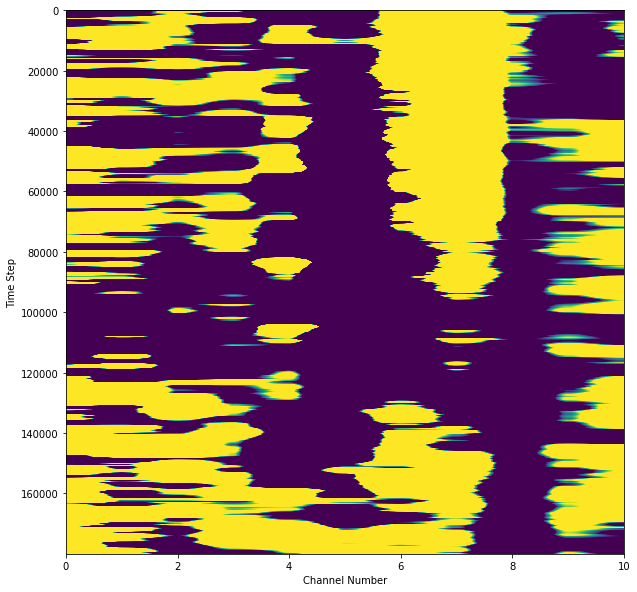

In [19]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.xlim(0,10)
plt.ylabel('Time Step')
plt.show()

In [29]:
avg = (data[:,0]+data[:,1]+data[:,2]+data[:,3]+data[:,4])/5

[b,a] = butter(2, 0.1, 'highpass', fs = 100)
data_filt = filtfilt(b,a,avg,axis = 0)

Text(0.5, 1.0, 'Average of First 5 Channels')

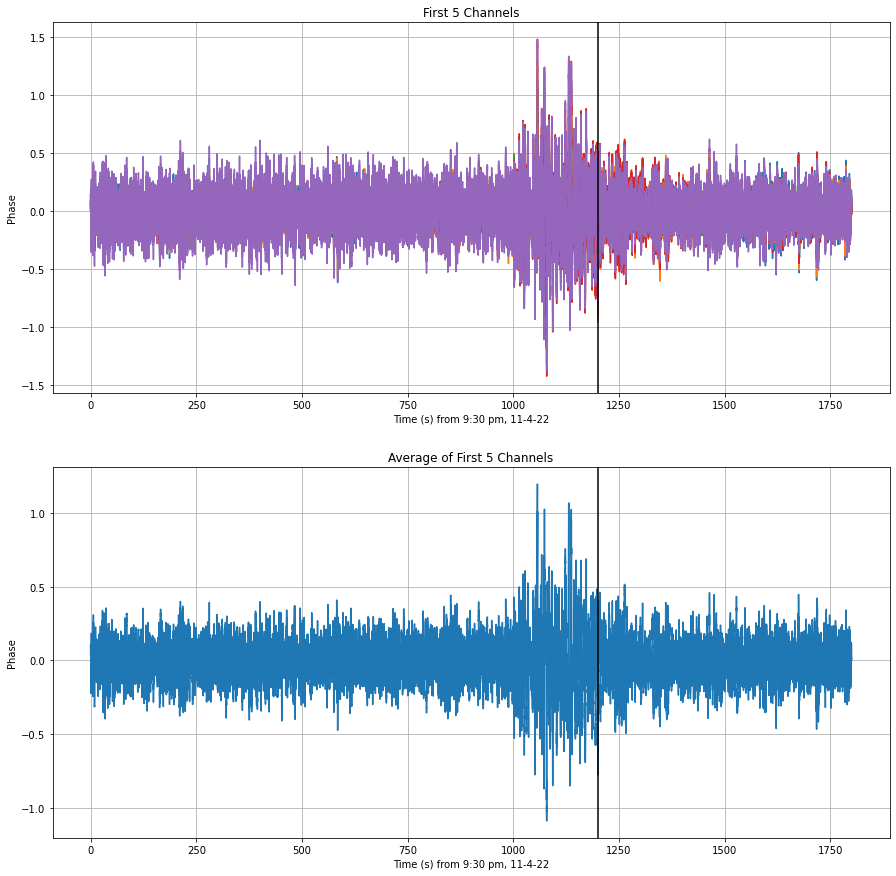

In [36]:
# filter all other data

fig,ax = plt.subplots(2,1,figsize=(15,15))

ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,41],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,42],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,43],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,44],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,45],axis=0))
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,((data[:,41]+data[:,42]+data[:,43]+data[:,44]+data[:,45])/5),axis=0))
ax[0].axvline(1200,c='k')
ax[1].axvline(1200,c='k')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time (s) from 9:30 pm, 11-4-22')
ax[1].set_xlabel('Time (s) from 9:30 pm, 11-4-22')
ax[0].set_ylabel('Phase')
ax[1].set_ylabel('Phase')
ax[0].set_title('First 5 Channels')
ax[1].set_title('Average of First 5 Channels')

In [38]:
data = data[:,1]

# t_range = [date]

ValueError: x and y must be the same size

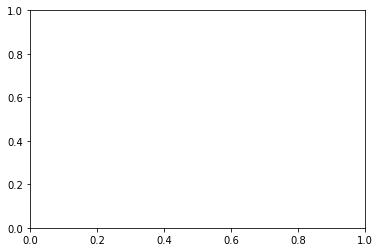

In [40]:
plt.scatter(

In [ ]:
#channels 40-46 are a good 